In [253]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Обработка данных
#### Сделаем необходимую очистку данных и попутно создадим несколько переменных

In [157]:
data2 = pd.read_csv('unemployed_2/unemployed_2_data.csv', sep=';', header=0, na_values='None')
data2.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,6,7,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(4947059, 64)

In [158]:
data2.columns

Index(['id', 'source', 'state_region_code', 'status', 'cause_removed',
       'czn_region_code', 'did_not_work', 'is_doubled', 'dismissal_reason',
       'social_status_has_child', 'social_status_predpens', 'user_uuid',
       'work_in_2019_4', 'work_in_2019_5', 'work_in_2019_6', 'work_in_2019_7',
       'work_in_2019_8', 'work_in_2019_9', 'work_in_2019_10',
       'work_in_2019_11', 'work_in_2019_12', 'work_in_2020_1',
       'work_in_2020_2', 'work_in_2020_3', 'work_in_2020_4', 'work_in_2020_5',
       'work_in_2020_6', 'work_in_2020_7', 'work_in_2020_8', 'work_in_2020_9',
       'work_in_2020_10', 'wage_av_2019_1', 'wage_av_2019_2', 'wage_av_2019_3',
       'wage_av_2019_4', 'wage_av_2020_1', 'wage_av_2020_2', 'wage_av_2020_3',
       'has_cv', 'cv_region', 'cv_position', 'cv_industry', 'cv_educationtype',
       'cv_drivelicence', 'cv_experience', 'cv_salary', 'cv_birthday',
       'cv_gender', 'cv_retrainingcapability', 'sum_social_benefits',
       'days_social_benefits', 'sum_ch

In [159]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947059 entries, 0 to 4947058
Data columns (total 64 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         object 
 1   source                     object 
 2   state_region_code          int64  
 3   status                     object 
 4   cause_removed              object 
 5   czn_region_code            float64
 6   did_not_work               object 
 7   is_doubled                 object 
 8   dismissal_reason           object 
 9   social_status_has_child    object 
 10  social_status_predpens     object 
 11  user_uuid                  object 
 12  work_in_2019_4             object 
 13  work_in_2019_5             object 
 14  work_in_2019_6             object 
 15  work_in_2019_7             object 
 16  work_in_2019_8             object 
 17  work_in_2019_9             object 
 18  work_in_2019_10            object 
 19  work_in_2019_11            object 
 20  wo

In [160]:
data2.describe()

,state_region_code,czn_region_code,wage_av_2019_1,wage_av_2019_2,wage_av_2019_3,wage_av_2019_4,wage_av_2020_1,wage_av_2020_2,wage_av_2020_3,cv_region,cv_experience,cv_salary,cv_birthday,sum_social_benefits,days_social_benefits,sum_child_social_benefits,week_create,week_approved,week_employed,week_deleted,week_removed,week_not_approved
count,4947059.0000,4946048.0000,1418902.0000,1424652.0000,1405769.0000,1303848.0000,605364.0000,286291.0000,297.0000,2451650.0000,2451653.0000,2451653.0000,2446907.0000,3731313.0000,3731325.0000,1388769.0000,4947059.0000,3733764.0000,249325.0000,293907.0000,691930.0000,1020532.0000
mean,40.3795,40.3724,23587.9257,24635.2008,24070.0853,24520.9203,25468.2434,25595.7022,25009.6970,41.4395,3.5641,32141.4953,1984.1424,16620.5719,36.3902,7478.5854,27.2072,28.3438,37.2748,34.9682,39.6302,30.6186
std,24.9428,24.9381,20117.3906,20790.8836,20648.2619,20713.9927,20498.0516,20952.6461,23635.3640,24.7300,5.9102,17340.6235,10.1279,20903.5984,53.4745,8885.8552,8.0196,7.8490,7.1374,8.5113,6.0604,7.5695
min,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,65.0000,1.0000,0.0000,499.0000,1954.0000,0.0000,0.0000,0.0000,15.0000,16.0000,16.0000,16.0000,19.0000,16.0000
25%,20.0000,20.0000,11252.0000,11305.0000,10972.0000,11316.0000,12221.7500,12120.5000,8997.0000,20.0000,0.0000,20000.0000,1977.0000,4500.0000,0.0000,3000.0000,20.0000,21.0000,33.0000,28.0000,36.0000,25.0000
50%,38.0000,38.0000,17579.0000,18245.0000,17683.0000,18027.0000,19712.0000,19552.0000,16706.0000,38.0000,1.0000,30000.0000,1985.0000,10500.0000,0.0000,6000.0000,26.0000,27.0000,39.0000,36.0000,41.0000,30.0000
75%,61.0000,61.0000,30019.0000,31973.0000,31205.0000,31379.0000,32787.0000,33122.0000,33324.0000,62.0000,5.0000,40000.0000,1992.0000,20000.0000,64.0000,9000.0000,33.0000,34.0000,43.0000,42.0000,44.0000,36.0000
max,99.0000,99.0000,100003.0000,100006.0000,100009.0000,100012.0000,100003.0000,100006.0000,100008.0000,99.0000,40.0000,100000.0000,2005.0000,150000.0000,215.0000,100000.0000,44.0000,47.0000,47.0000,47.0000,47.0000,47.0000


In [161]:
data2.isna().sum(axis=0)

id                                 0
source                             0
state_region_code                  0
status                             0
cause_removed                4927464
czn_region_code                 1011
did_not_work                    3214
is_doubled                     11281
dismissal_reason             1942039
social_status_has_child         3214
social_status_predpens          3214
user_uuid                          0
work_in_2019_4               4071814
work_in_2019_5               3179012
work_in_2019_6               2172260
work_in_2019_7               1382976
work_in_2019_8                802315
work_in_2019_9                368861
work_in_2019_10                22795
work_in_2019_11                22795
work_in_2019_12                22795
work_in_2020_1                 23268
work_in_2020_2                 23268
work_in_2020_3                 23268
work_in_2020_4                 23268
work_in_2020_5                774334
work_in_2020_6               1474055
w

In [162]:
data2.status.value_counts()

APPROVED               2341687
NOT_APPROVED            859383
REREGISTRATION          516373
REMOVED                 504617
DELETED                 274107
EMPLOYED                198213
FILLING_APPLICATION     115587
NEW                      63745
IN_PROGRESS              48765
REQUEST                  18595
JOB_OFFERED               5987
Name: status, dtype: int64

In [163]:
data2[data2.week_employed.notna()].status.value_counts()

EMPLOYED               198211
APPROVED                30495
REMOVED                 11123
REREGISTRATION           7025
NOT_APPROVED              870
IN_PROGRESS               624
DELETED                   446
FILLING_APPLICATION       275
NEW                       116
JOB_OFFERED                71
REQUEST                    69
Name: status, dtype: int64

In [164]:
data2_cleaned = data2.loc[(data2.status == 'APPROVED') | (data2.status == 'EMPLOYED'), \
                         ['state_region_code', 'status', 'czn_region_code', 'did_not_work', 
                          'is_doubled', 'social_status_has_child', 'social_status_predpens', 
                          'user_uuid', 'work_in_2019_7', 'work_in_2019_8', 'work_in_2019_9',
                          'work_in_2019_10', 'work_in_2019_11', 'work_in_2019_12', 'work_in_2020_1', 
                          'work_in_2020_2', 'work_in_2020_3', 'work_in_2020_4', 'work_in_2020_5', 
                          'work_in_2020_6', 'work_in_2020_7', 'work_in_2020_8', 'work_in_2020_9',
                          'wage_av_2019_1', 'wage_av_2019_2', 'wage_av_2019_3', 'wage_av_2019_4',
                          'wage_av_2020_1', 'wage_av_2020_2', 'wage_av_2020_3',
                          'cv_region', 'cv_position', 'cv_industry', 'cv_educationtype',
                          'cv_drivelicence', 'cv_experience', 'cv_salary', 'cv_birthday',
                          'cv_gender', 'cv_retrainingcapability', 'sum_social_benefits',
                          'sum_child_social_benefits', 'week_approved', 'week_employed']]
data2_cleaned.shape

(2539900, 44)

In [165]:
data2_cleaned[data2_cleaned.duplicated(subset='user_uuid')].status.value_counts()

APPROVED    10320
EMPLOYED     6662
Name: status, dtype: int64

In [405]:
data2_selected = data2_cleaned.loc[data2_cleaned.duplicated(subset='user_uuid') == False, :]
data2_selected.drop(columns=['user_uuid'], inplace=True)
data2_selected.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(2522918, 43)

In [406]:
data2_selected.loc[:, 'age'] = 2020 - data2_selected.cv_birthday

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [407]:
data2_selected.loc[:, 'work_2019_7_2020_9'] = (data2_selected.loc[:, 'work_in_2019_7':'work_in_2020_9'].sum(axis=1) > 0).astype('int')
data2_selected.drop(columns=['work_in_2019_7', 'work_in_2019_8', 'work_in_2019_9',
                             'work_in_2019_10', 'work_in_2019_11', 'work_in_2019_12', 'work_in_2020_1', 
                             'work_in_2020_2', 'work_in_2020_3', 'work_in_2020_4', 'work_in_2020_5',
                             'work_in_2020_6', 'work_in_2020_7', 'work_in_2020_8', 'work_in_2020_9',], inplace=True)

In [408]:
# sns.boxplot(data=data2_final, x='employed', y='sum_social_benefits')

In [409]:
# data2_final.cv_gender.value_counts(normalize=True)

In [410]:
data2_selected.cv_gender.value_counts(normalize=True)

Женский   0.5816
Мужской   0.4184
Name: cv_gender, dtype: float64

In [411]:
data2_selected.cv_educationtype.value_counts(normalize=True)

Высшее                     0.3515
Среднее профессиональное   0.3428
Среднее                    0.2684
Незаконченное высшее       0.0374
Name: cv_educationtype, dtype: float64

In [412]:
# data2_final.cv_educationtype.value_counts(normalize=True)

In [413]:
data2_selected.loc[:, 'last_salary'] = data2_selected.wage_av_2020_3
data2_selected.last_salary.fillna(data2_selected.wage_av_2020_2, inplace=True)
data2_selected.last_salary.fillna(data2_selected.wage_av_2020_1, inplace=True)
data2_selected.last_salary.fillna(data2_selected.wage_av_2019_4, inplace=True)
data2_selected.last_salary.fillna(data2_selected.wage_av_2019_3, inplace=True)
data2_selected.last_salary.fillna(data2_selected.wage_av_2019_2, inplace=True)
data2_selected.last_salary.fillna(data2_selected.wage_av_2019_1, inplace=True)

data2_selected.loc[data2_selected.did_not_work == True, 'last_salary'] = 0

data2_selected.drop(columns=['wage_av_2019_1', 'wage_av_2019_2', 'wage_av_2019_3', 'wage_av_2019_4', 
                             'wage_av_2020_1', 'wage_av_2020_2', 'wage_av_2020_3'], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [414]:
data2_selected.drop(columns=['status', 'czn_region_code', 'is_doubled', 'cv_region', 'cv_position'], inplace=True)

In [415]:
data2_selected.isna().sum(axis=0)

state_region_code                  0
did_not_work                     118
social_status_has_child          118
social_status_predpens           118
cv_industry                  1290102
cv_educationtype             1594059
cv_drivelicence              1290102
cv_experience                1290102
cv_salary                    1290102
cv_birthday                  1292685
cv_gender                    1292670
cv_retrainingcapability      1595290
sum_social_benefits            21919
sum_child_social_benefits    1462594
week_approved                  20148
week_employed                2301111
age                          1292685
work_2019_7_2020_9                 0
last_salary                   743073
dtype: int64

In [416]:
data2_selected.sum_child_social_benefits.fillna(0, inplace=True)

In [417]:
data2_selected.columns

Index(['state_region_code', 'did_not_work', 'social_status_has_child',
       'social_status_predpens', 'cv_industry', 'cv_educationtype',
       'cv_drivelicence', 'cv_experience', 'cv_salary', 'cv_birthday',
       'cv_gender', 'cv_retrainingcapability', 'sum_social_benefits',
       'sum_child_social_benefits', 'week_approved', 'week_employed', 'age',
       'work_2019_7_2020_9', 'last_salary'],
      dtype='object')

In [418]:
data2_final = data2_selected.dropna(subset=['state_region_code', 'did_not_work', 'social_status_has_child',
                                            'social_status_predpens', 'cv_industry', 'cv_educationtype',
                                            'cv_drivelicence', 'cv_experience', 'cv_salary', 'cv_birthday',
                                            'cv_gender', 'cv_retrainingcapability', 'sum_social_benefits',
                                            'sum_child_social_benefits', 'week_approved', 'age',
                                            'work_2019_7_2020_9', 'last_salary'])
data2_final.shape # (513275, 19)

(513275, 19)

In [419]:
data2_final.cv_industry.value_counts()

Продажи, закупки, снабжение, торговля                               77909
Административная работа, секретариат, АХО                           43719
Работы, не требующие квалификации                                   34610
Транспорт, автобизнес, логистика, склад, ВЭД                        30988
Финансы, кредит, страхование, пенсионное обеспечение                27634
Производство                                                        23057
Строительство, ремонт, стройматериалы, недвижимость                 21770
Государственная служба, некоммерческие организации                  21369
Рабочие специальности                                               21258
Здравоохранение, спорт, красота, социальное обеспечение             18886
Образование, наука                                                  17966
Пищевая промышленность                                              17947
Безопасность, службы охраны                                         15034
Информационные технологии, телекоммуни

In [420]:
# data2_final.isna().sum(axis=0)

In [421]:
data2_final.loc[:, 'duration'] = data2_final.week_employed - data2_final.week_approved
data2_final.loc[:, 'duration'] = data2_final.duration.fillna(47 - data2_final.week_approved)

In [422]:
(data2_final.duration < 0).sum()

76

In [423]:
data2_final = data2_final.loc[data2_final.duration >= 0, :]

In [424]:
data2_final.loc[:, 'mean_posobie'] = data2_final.sum_social_benefits / data2_final.duration * 4
data2_final.loc[data2_final.duration.between(0, 3), 'mean_posobie'] = data2_final.sum_social_benefits

In [425]:
# data2_final.loc[:, 'duration'].hist(figsize=(15, 7), bins=150)

In [426]:
# from lifelines import KaplanMeierFitter
# kmf = KaplanMeierFitter()

# T = data2_final['duration']
# E = data2_final['week_employed'].notna().astype('int')

# kmf.fit(T, event_observed=E)
# kmf.survival_function_.plot(figsize=(12, 7))
# kmf.plot_survival_function(figsize=(12, 7))

In [427]:
data2_final.loc[:, 'employed'] = data2_final.week_employed.notna().astype('int')

In [428]:
data2_final.drop(columns=['week_employed'], inplace=True)

In [429]:
data2_final.head(3)

,state_region_code,did_not_work,social_status_has_child,social_status_predpens,cv_industry,cv_educationtype,cv_drivelicence,cv_experience,cv_salary,cv_birthday,cv_gender,cv_retrainingcapability,sum_social_benefits,sum_child_social_benefits,week_approved,age,work_2019_7_2020_9,last_salary,duration,mean_posobie,employed
1,30,False,True,False,Производство,Среднее,False,1.0000,20000.0000,1980.0000,Мужской,Готов к переобучению,51500.0000,3000.0000,28.0000,40.0000,1,23213.0000,19.0000,10842.1053,0
3,5,True,True,False,"Продажи, закупки, снабжение, торговля",Среднее,False,0.0000,10000.0000,1991.0000,Женский,Готов к переобучению,1500.0000,3000.0000,39.0000,29.0000,0,0.0000,8.0000,750.0000,0
8,58,False,True,False,"Услуги населению, сервисное обслуживание",Среднее,False,2.0000,30000.0000,1982.0000,Мужской,Готов к переобучению,78700.0000,24000.0000,20.0000,38.0000,1,11434.0000,27.0000,11659.2593,0


## Визуализация
#### Прежде чем сделаем дополнительные преобразования, сравним распределения некоторых переменных:

In [430]:
sns.set_palette(sns.color_palette('tab10'))

In [431]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 7))
# data2_selected.loc[:, 'age'].hist(figsize=(15, 7), bins=100)
# data2_final.loc[:, 'age'].hist(figsize=(15, 7), bins=100)

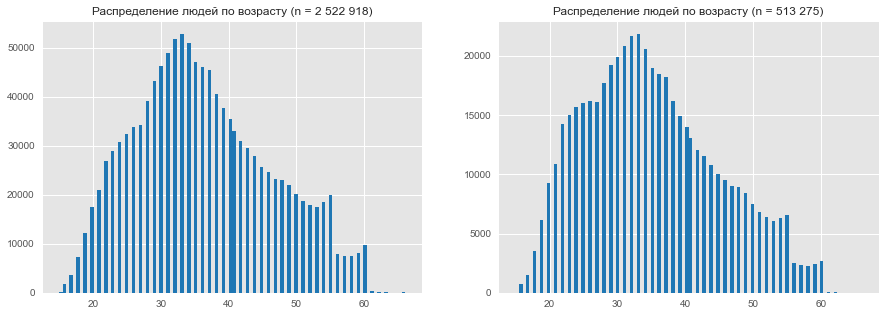

In [432]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
data2_selected.loc[:, 'age'].hist(bins=100, ax=ax[0])
ax[0].set_title('Распределение людей по возрасту (n = 2 522 918)', fontsize=12)
data2_final.loc[:, 'age'].hist(bins=100, ax=ax[1])
ax[1].set_title('Распределение людей по возрасту (n = 513 275)', fontsize=12)
plt.show()

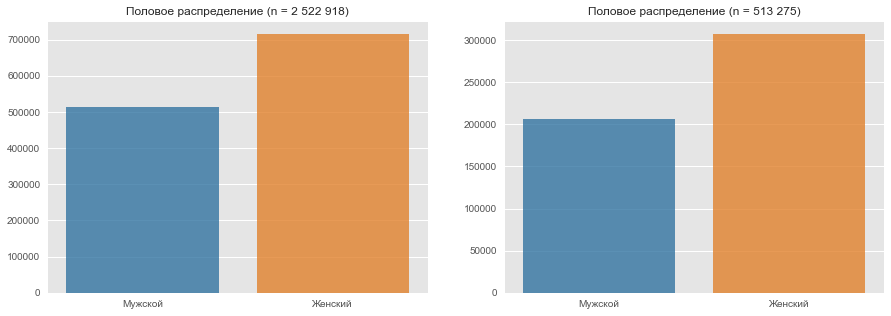

In [433]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=data2_selected, x='cv_gender', alpha=0.8, ax=ax[0])
ax[0].set_title('Половое распределение (n = 2 522 918)', fontsize=12)
ax[0].set(xlabel='', ylabel='')
sns.countplot(data=data2_final, x='cv_gender', alpha=0.8, ax=ax[1])
ax[1].set_title('Половое распределение (n = 513 275)', fontsize=12)
ax[1].set(xlabel='', ylabel='')
plt.show()

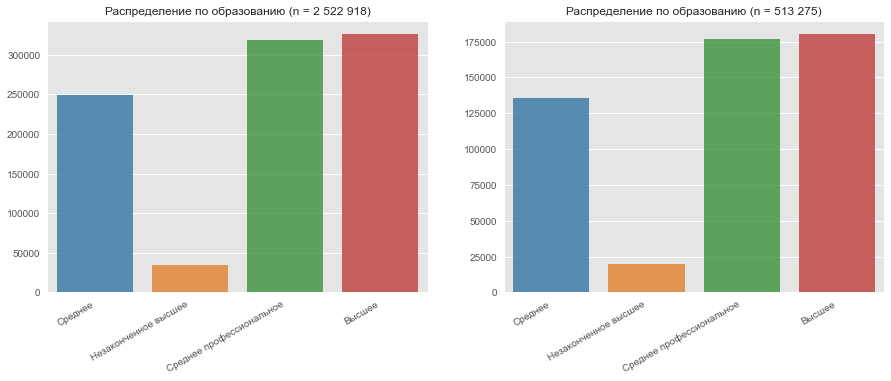

In [434]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=data2_selected, x='cv_educationtype', alpha=0.8,
              order=['Среднее', 'Незаконченное высшее', 'Среднее профессиональное', 'Высшее'], ax=ax[0])
ax[0].set_title('Распределение по образованию (n = 2 522 918)', fontsize=12)
ax[0].set(xlabel='', ylabel='')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, horizontalalignment='right')

sns.countplot(data=data2_final, x='cv_educationtype', alpha=0.8,
              order=['Среднее', 'Незаконченное высшее', 'Среднее профессиональное', 'Высшее'], ax=ax[1])
ax[1].set_title('Распределение по образованию (n = 513 275)', fontsize=12)
ax[1].set(xlabel='', ylabel='')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

In [435]:
# data2_selected.did_not_work = data2_selected.did_not_work.astype('int')
data2_final.did_not_work = data2_final.did_not_work.astype('int')

In [436]:
data2_final = data2_final[data2_final.age >= 18]
data2_selected = data2_selected[data2_selected.age >= 18]

<AxesSubplot:xlabel='age', ylabel='did_not_work'>

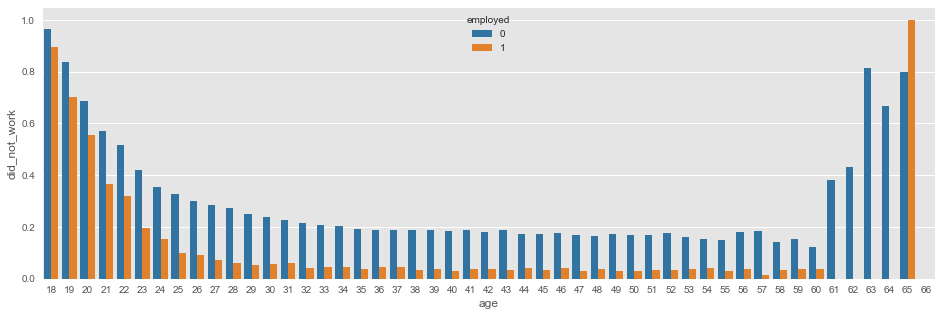

In [437]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
dat = data2_final.groupby(['age', 'employed'])['did_not_work'].mean().reset_index()
dat.age = dat.age.astype('int')
sns.barplot(data=dat, x='age', y='did_not_work', hue='employed')

In [438]:
data2_final[data2_final.social_status_predpens == 1].age.value_counts()

55.0000    3200
54.0000    2595
60.0000    1813
59.0000    1475
53.0000    1430
52.0000    1076
58.0000     843
49.0000     621
50.0000     598
51.0000     597
57.0000     592
48.0000     448
47.0000     409
56.0000     398
46.0000     342
45.0000     274
35.0000     185
36.0000     181
37.0000     179
33.0000     176
40.0000     172
32.0000     171
44.0000     164
43.0000     159
34.0000     158
38.0000     158
41.0000     156
42.0000     153
39.0000     152
31.0000     150
29.0000     150
27.0000     141
26.0000     140
23.0000     129
28.0000     126
25.0000     125
30.0000     124
24.0000     115
22.0000     108
21.0000      90
20.0000      82
19.0000      63
18.0000      37
61.0000      30
62.0000      15
63.0000       8
64.0000       4
65.0000       2
66.0000       2
Name: age, dtype: int64

In [439]:
data2_final = data2_final[data2_final.age <= 60]
data2_final.shape

(510765, 21)

In [440]:
data2_final.social_status_has_child = data2_final.social_status_has_child.astype('int')
data2_final.social_status_predpens = data2_final.social_status_predpens.astype('int')
data2_final.cv_gender = data2_final.cv_gender.map({'Мужской': 0, 'Женский': 1})
data2_final.cv_retrainingcapability = data2_final.cv_retrainingcapability.map({'Готов к переобучению': 1, 
                                                                               'Не готов к переобучению': 0})
data2_final.cv_educationtype = data2_final.cv_educationtype.map({'Высшее': 2, 'Незаконченное высшее': 0, 
                                                                 'Среднее': 0, 'Среднее профессиональное': 1})

In [441]:
data2_final.head()

,state_region_code,did_not_work,social_status_has_child,social_status_predpens,cv_industry,cv_educationtype,cv_drivelicence,cv_experience,cv_salary,cv_birthday,cv_gender,cv_retrainingcapability,sum_social_benefits,sum_child_social_benefits,week_approved,age,work_2019_7_2020_9,last_salary,duration,mean_posobie,employed
1,30,0,1,0,Производство,0,False,1.0000,20000.0000,1980.0000,0,1,51500.0000,3000.0000,28.0000,40.0000,1,23213.0000,19.0000,10842.1053,0
3,5,1,1,0,"Продажи, закупки, снабжение, торговля",0,False,0.0000,10000.0000,1991.0000,1,1,1500.0000,3000.0000,39.0000,29.0000,0,0.0000,8.0000,750.0000,0
8,58,0,1,0,"Услуги населению, сервисное обслуживание",0,False,2.0000,30000.0000,1982.0000,0,1,78700.0000,24000.0000,20.0000,38.0000,1,11434.0000,27.0000,11659.2593,0
12,23,0,0,0,"Строительство, ремонт, стройматериалы, недвижи...",0,False,4.0000,30000.0000,1984.0000,1,1,1500.0000,0.0000,25.0000,36.0000,1,23243.0000,22.0000,272.7273,0
28,66,0,1,0,Высший менеджмент,2,True,5.0000,50000.0000,1988.0000,0,0,27900.0000,0.0000,21.0000,32.0000,1,8415.0000,26.0000,4292.3077,0


In [442]:
data2_final.to_csv('unemployed_2_cleaned_3.csv', index=False)

## Подготовка данных для модели

In [480]:
data2_final = pd.read_csv('unemployed_2_cleaned_3.csv').drop(columns='cv_industry')
data2_final.shape

(510765, 20)

In [481]:
codes = pd.read_excel('kody.xls').iloc[:, 1:]
data2_final = data2_final.merge(codes, left_on='state_region_code', right_on='code')

In [482]:
structure = pd.read_excel('struktura.xlsx')
data2_final = data2_final.merge(structure, left_on='state_region_code', right_on='code')

In [483]:
data2_final.drop(columns=['code_x', 'code_y', 'state_region_code'], inplace=True)

In [484]:
data2_final = pd.get_dummies(data2_final, columns=['cv_educationtype'], drop_first=True)
data2_final.head()

,did_not_work,social_status_has_child,social_status_predpens,cv_drivelicence,cv_experience,cv_salary,cv_birthday,cv_gender,cv_retrainingcapability,sum_social_benefits,sum_child_social_benefits,week_approved,age,work_2019_7_2020_9,last_salary,duration,mean_posobie,employed,year_unemployment,dam,cv_educationtype_1,cv_educationtype_2
0,0,1,0,False,1.0000,20000.0000,1980.0000,0,1,51500.0000,3000.0000,28.0000,40.0000,1,23213.0000,19.0000,10842.1053,0,5.6333,0.0635,0,0
1,0,0,0,False,6.0000,20000.0000,1988.0000,0,1,5700.0000,0.0000,22.0000,32.0000,1,8630.0000,16.0000,1425.0000,1,5.6333,0.0635,0,1
2,1,0,0,False,0.0000,35000.0000,1987.0000,0,1,4500.0000,0.0000,21.0000,33.0000,0,0.0000,26.0000,692.3077,0,5.6333,0.0635,1,0
3,0,0,0,False,2.0000,20000.0000,1986.0000,1,1,69000.0000,0.0000,17.0000,34.0000,1,12168.0000,30.0000,9200.0000,0,5.6333,0.0635,0,0
4,1,1,0,True,7.0000,30000.0000,1994.0000,1,1,3000.0000,0.0000,20.0000,26.0000,0,0.0000,27.0000,444.4444,0,5.6333,0.0635,0,0


In [485]:
data2_final['18_30'] = data2_final.age.between(18, 30)
data2_final['31_40'] = data2_final.age.between(31, 40)
data2_final['41_50'] = data2_final.age.between(41, 50)

In [486]:
data2_final.drop(columns=['cv_birthday', 'age', 'week_approved', 'cv_drivelicence', 
                          'social_status_predpens', 'mean_posobie'], inplace=True)

In [487]:
data2_final.cv_salary = data2_final.cv_salary / 1000
data2_final.sum_social_benefits = data2_final.sum_social_benefits / 1000
data2_final.sum_child_social_benefits = data2_final.sum_child_social_benefits / 1000
# data2_final.mean_posobie = data2_final.mean_posobie / 1000

In [488]:
data2_final.isna().sum()

did_not_work                 0
social_status_has_child      0
cv_experience                0
cv_salary                    0
cv_gender                    0
cv_retrainingcapability      0
sum_social_benefits          0
sum_child_social_benefits    0
work_2019_7_2020_9           0
last_salary                  0
duration                     0
employed                     0
year_unemployment            0
dam                          0
cv_educationtype_1           0
cv_educationtype_2           0
18_30                        0
31_40                        0
41_50                        0
dtype: int64

In [489]:
data2_final.dam = data2_final.dam * 100

In [499]:
data2_final.describe()

,did_not_work,social_status_has_child,cv_experience,cv_salary,cv_gender,cv_retrainingcapability,sum_social_benefits,sum_child_social_benefits,work_2019_7_2020_9,last_salary,duration,employed,year_unemployment,dam,cv_educationtype_1,cv_educationtype_2
count,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000,510762.0000
mean,0.2381,0.3765,4.8250,32.8799,0.5991,0.7794,25.2925,2.8946,0.7429,18637.0554,17.8140,0.1179,6.2298,4.3004,0.3464,0.3534
std,0.4259,0.4845,6.6271,17.0284,0.4901,0.4146,27.9226,6.9476,0.4371,20760.9288,8.0519,0.3225,4.4059,1.0267,0.4758,0.4780
min,0.0000,0.0000,0.0000,0.4990,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.3333,2.5475,0.0000,0.0000
25%,0.0000,0.0000,0.0000,20.0000,0.0000,1.0000,6.0000,0.0000,0.0000,59.0000,12.0000,0.0000,4.0333,3.6383,0.0000,0.0000
50%,0.0000,0.0000,2.0000,30.0000,1.0000,1.0000,14.0000,0.0000,1.0000,13379.0000,18.0000,0.0000,4.7000,4.1426,0.0000,0.0000
75%,0.0000,1.0000,7.0000,40.0000,1.0000,1.0000,33.0000,3.0000,1.0000,26224.0000,25.0000,0.0000,6.4333,4.8261,1.0000,1.0000
max,1.0000,1.0000,40.0000,100.0000,1.0000,1.0000,150.0000,100.0000,1.0000,100012.0000,31.0000,1.0000,26.3667,7.6863,1.0000,1.0000


In [498]:
print(data2_final.drop(columns=['ЛИСТ КОЛОНОК']).describe().to_latex())

\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
{} &  did\_not\_work &  social\_status\_has\_child &  cv\_experience &   cv\_salary &  sum\_social\_benefits &  sum\_child\_social\_benefits &  work\_2019\_7\_2020\_9 &  last\_salary &    duration &    employed &  year\_unemployment &         dam &  cv\_educationtype\_1 &  cv\_educationtype\_2 \\
\midrule
count &   510762.0000 &              510762.0000 &    510762.0000 & 510762.0000 &          510762.0000 &                510762.0000 &         510762.0000 &  510762.0000 & 510762.0000 & 510762.0000 &        510762.0000 & 510762.0000 &         510762.0000 &         510762.0000 \\
mean  &        0.2381 &                   0.3765 &         4.8250 &     32.8799 &              25.2925 &                     2.8946 &              0.7429 &   18637.0554 &     17.8140 &      0.1179 &             6.2298 &      4.3004 &              0.3464 &              0.3534 \\
std   &        0.4259 &                   0.4845 &         6.6271 &     17.0284 &            

In [490]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(data2_final, duration_col='duration', event_col='employed')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 510762 total observations, 450528 right-censored observations>
             duration col = 'duration'
                event col = 'employed'
      baseline estimation = breslow
   number of observations = 510762
number of events observed = 60234
   partial log-likelihood = -749724.57
         time fit was run = 2020-12-19 23:04:21 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
did_not_work               -0.20       0.82       0.02            -0.24            -0.16                 0.79                 0.85
social_status_has_child     0.17       1.19       0.01             0.15             0.19                 1.16                 1.21
cv_experience              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cv_salary                  -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
cv_gender                  -0.12       0.89       0.01            -0.14            -0.10                 0.87                 0.90
cv_retrainingcapability     0.05       1.05       0.01             0.03             0.07                 1.03                 1.07
sum_social_benefits        -0.02       0.98       0.00            -0.02            -0.02                 0.98                 0.98
sum_child_social_benefits  -0.03       0.98       0.00            -0.03            -0.02                 0.97                 0.98
work_2019_7_2020_9          0.95       2.59       0.02             0.92             0.99                 2.51                 2.68
last_salary                 0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
year_unemployment          -0.03       0.97       0.00            -0.03            -0.03                 0.97                 0.97
dam                        -0.21       0.81       0.00            -0.22            -0.20                 0.80                 0.81
cv_educationtype_1          0.16       1.18       0.01             0.14             0.19                 1.15                 1.20
cv_educationtype_2          0.10       1.10       0.01             0.07             0.12                 1.08                 1.12
18_30                       0.10       1.11       0.02             0.07             0.14                 1.07                 1.15
31_40                      -0.01       0.99       0.02            -0.04             0.02                 0.96                 1.02
41_50                       0.08       1.08       0.02             0.05             0.11                 1.05                 1.12

                               z      p   -log2(p)
covariate                                         
did_not_work              -10.06 <0.005      76.66
social_status_has_child    15.72 <0.005     182.57
cv_experience              -1.81   0.07       3.81
cv_salary                 -29.82 <0.005     646.58
cv_gender                 -13.71 <0.005     139.65
cv_retrainingcapability     4.42 <0.005      16.65
sum_social_benefits       -82.44 <0.005        inf
sum_child_social_benefits -20.59 <0.005     310.49
work_2019_7_2020_9         54.37 <0.005        inf
last_salary                50.72 <0.005        inf
year_unemployment         -31.24 <0.005     709.12
dam                       -46.94 <0.005        inf
cv_educationtype_1         15.26 <0.005     172.24
cv_educationtype_2          8.35 <0.005      53.69
18_30                       6.26 <0.005      31.26
31_40                      -0.48   0.63       0.67
41_50                       4.76 <0.005      19.01
---
Concordance = 0.70
Partial AIC = 1499483.14
log-likelihood ratio test = 25285.86 on 17 df
-log2(p) of ll-ratio test = inf

In [457]:
cph.print_summary(style="latex", columns=['coef', 'exp(coef)', 'exp(coef) lower 95%', 'exp(coef) upper 95%', 'p'])

\begin{tabular}{lrrrrr}
\toprule
{} &  coef &  exp(coef) &  exp(coef) lower 95\% &  exp(coef) upper 95\% &    p \\
covariate                 &       &            &                      &                      &      \\
\midrule
did\_not\_work              & -0.20 &       0.82 &                 0.79 &                 0.85 & 0.00 \\
social\_status\_has\_child   &  0.17 &       1.19 &                 1.16 &                 1.21 & 0.00 \\
cv\_experience             & -0.00 &       1.00 &                 1.00 &                 1.00 & 0.07 \\
cv\_salary                 & -0.01 &       0.99 &                 0.99 &                 0.99 & 0.00 \\
cv\_gender                 & -0.12 &       0.89 &                 0.87 &                 0.90 & 0.00 \\
cv\_retrainingcapability   &  0.05 &       1.05 &                 1.03 &                 1.07 & 0.00 \\
sum\_social\_benefits       & -0.02 &       0.98 &                 0.98 &                 0.98 & 0.00 \\
sum\_child\_social\_benefits & -0.03 &   

In [491]:
cph.print_summary(style="html", columns=['coef', 'exp(coef)', 'exp(coef) lower 95%', 'exp(coef) upper 95%', 'p'])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <tbody>
    <tr>
      <th>model</th>
      <td>lifelines.CoxPHFitter</td>
    </tr>
    <tr>
      <th>duration col</th>
      <td>'duration'</td>
    </tr>
    <tr>
      <th>event col</th>
      <td>'employed'</td>
    </tr>
    <tr>
      <th>baseline estimation</th>
      <td>breslow</td>
    </tr>
    <tr>
      <th>number of observations</th>
      <td>510762</td>
    </tr>
    <tr>
      <th>number of events observed</th>
      <td>60234</td>
    </tr>
    <tr>
      <th>partial log-likelihood</th>
      <td>-749724.57</td>
    </tr>
    <tr>
      <th>time fit was run</th>
      <td>2020-12-19 23:04:21 UTC</td>
    </tr>
  </tbody>
</table>
</div><table border="1" class="dataframe">
  <thead>
    <tr style="

<AxesSubplot:xlabel='timeline'>

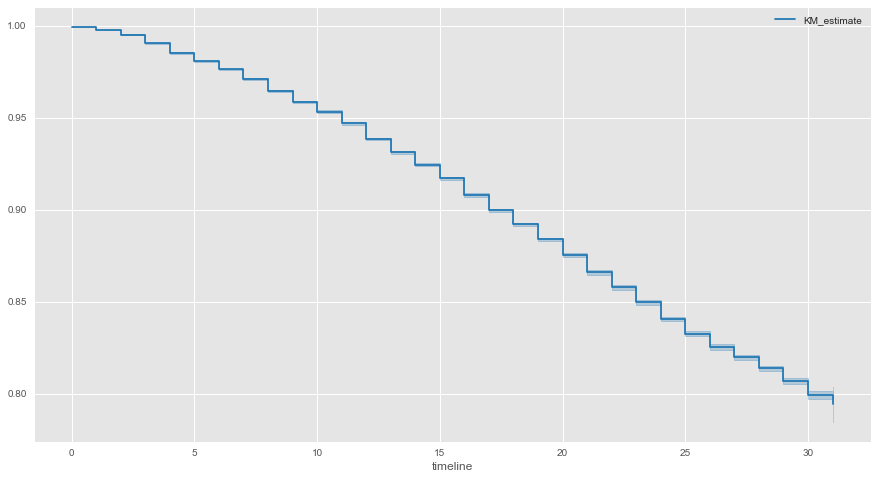

In [462]:
from lifelines import KaplanMeierFitter

T = data2_final['duration']
E = data2_final['employed']

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

# kmf.survival_function_.plot()
kmf.plot_survival_function(figsize=(15, 8))

<AxesSubplot:>

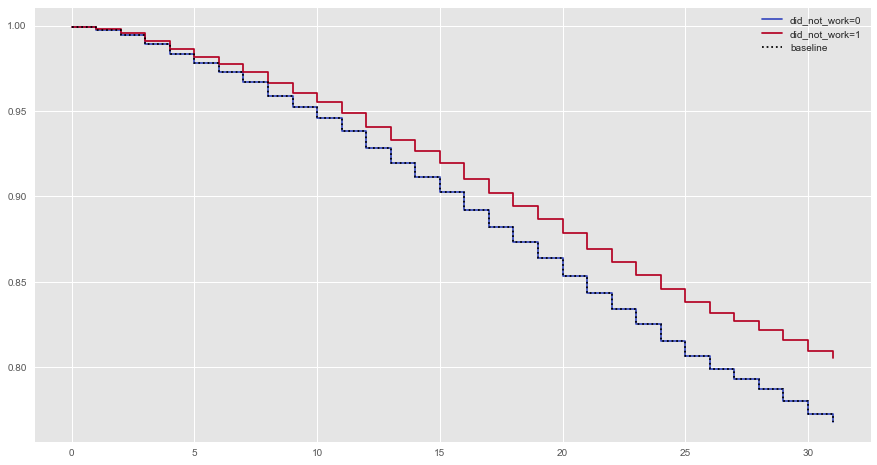

In [465]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(data2_final, duration_col='duration', event_col='employed')

cph.plot_partial_effects_on_outcome(covariates='did_not_work', values=[0, 1], cmap='coolwarm', figsize=(15, 8))

<AxesSubplot:>

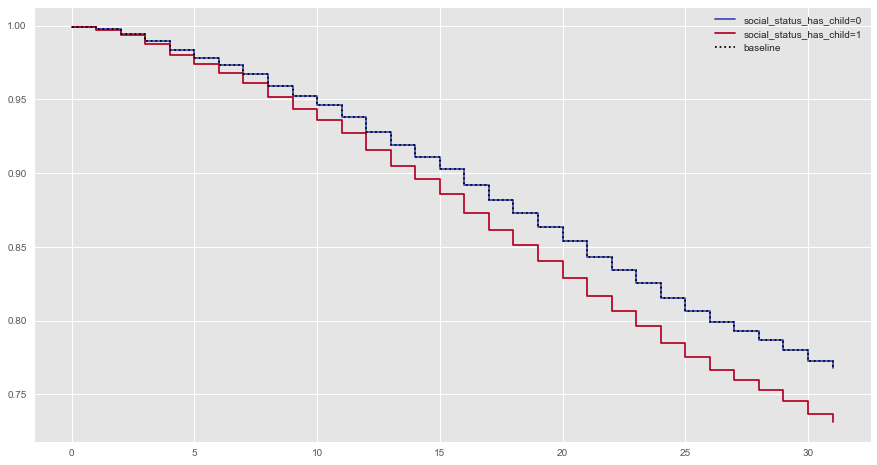

In [466]:
cph = CoxPHFitter()
cph.fit(data2_final, duration_col='duration', event_col='employed')

cph.plot_partial_effects_on_outcome(covariates='social_status_has_child', values=[0, 1], cmap='coolwarm', figsize=(15, 8))